<a id='top'></a>

# Homework 5: Confidence intervals and other things
***

**Name**: Christina Cleveland

***

This assignment is due on Moodle by **5 PM on Friday July 6**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4)

---

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import random
%matplotlib inline

---

<a id='p1'></a>
[Back to top](#top)

### [30 points] Problem 1 - Sea-level rise, schmee-level rise!

You have been contacted by the local government of Key West, Florida, to assess whether there is statistical evidence for sea-level rise in the area. You obtain from the University of Hawaii Sea Level Center's [gigantic repository of sea-level data](https://uhslc.soest.hawaii.edu/data/?rq) the daily mean sea levels file [linked here](https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jixzm0rl5dp6y4) and below.

In this problem, you will:
1. practice calculating confidence intervals, 
1. practice wrangling a real-life data set into a form where you can actually compute these confidence intervals, because life will rarely be so kind as to simply hand you a nicely packaged and cleaned set of data, and
1. save Key West from a watery fate?

In [4]:
# Local and web paths to the data; pick which works for you.
local_path = "data/sealevel_keywest.csv"
web_path   = "https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jixzm0rl5dp6y4"
file_path  = web_path

dfSL = pd.read_csv(file_path, header=None)
dfSL.rename(columns={0 : 'Year', 1 : 'Month', 2 : 'Day', 3 : 'SL'}, inplace=True)
dfSL.head()


,Year,Month,Day,SL
0,1913,1,20,1453
1,1913,1,21,1439
2,1913,1,22,1444
3,1913,1,23,1489
4,1913,1,24,1474


**Part A:**  Write a function `clean_data` to:
1. take in a single argument of a raw sea level data frame (e.g., `dfSL` above),
2. compute the fill-value used to replace missing sea level (SL) data (**not** hard-coded!),
3. use the Pandas `DataFrame.dropna` method to remove all missing rows of data, 
4. select only the data point on the second day of each month, and
4. return a cleaned Pandas data frame.

Use your shiny new function to clean the `dfSL` data frame and save the results in a new data frame.

There is a very specific reason to sample only one daily data point per month. We will talk about it later.

In [5]:
def clean_data(df):
    filledIn = df.replace(-32767,np.nan)
    cleaned = filledIn.dropna()
    final = cleaned.loc[cleaned['Day']==2]
    return final.reset_index(drop = True)

dfClean = clean_data(dfSL)
dfClean.head()



,Year,Month,Day,SL
0,1913,2,2,1409.0
1,1913,3,2,1397.0
2,1913,4,2,1402.0
3,1913,5,2,1450.0
4,1913,6,2,1490.0


**Part B:**  Plot the cleaned time series of sea levels. Be sure to label your axes, including units. The UHSLC data portal includes a link to the metadata accompanying our data set; if you are not sure about units, that would be a good place to start looking. For the $x$-axis, place the $x$ tick marks on January 2 of each year that is divisible by 10 (i.e., 1920, 1930, ...), and label with that year. You may need to do additional processing in order to grab these indices. 

**Bonus challenge (0 points):**  Why did I choose to work with the second day of each month instead of the first?  You may need to look at the original data set to answer this.

**Solution: Part B**

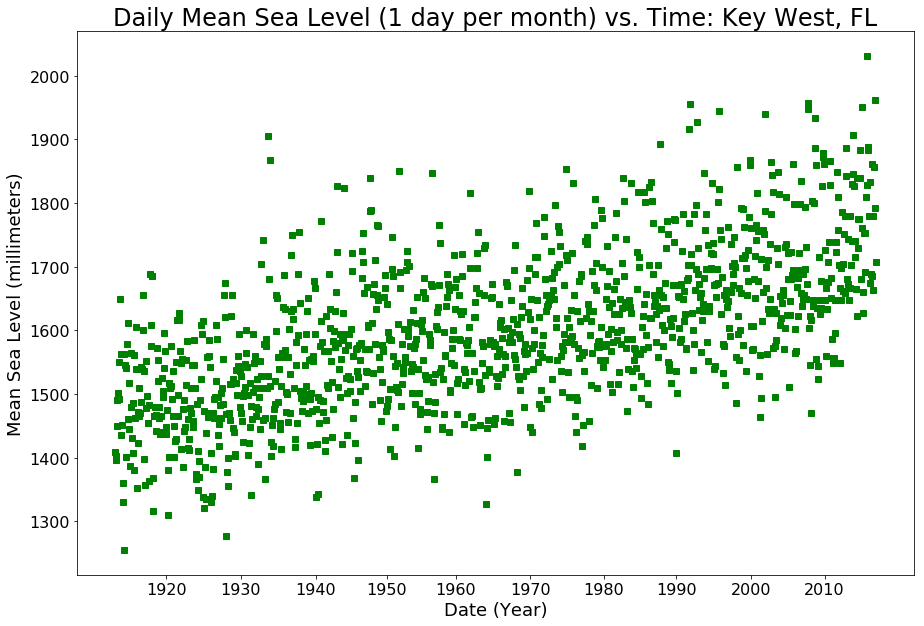

In [8]:
xticks = pd.DataFrame(dfClean.loc[(dfClean['Month']==1)&(dfClean['Year']%10==0)])
plt.figure(figsize=(15,10))
plt.plot(dfClean['SL'], 'gs')
plt.xticks(xticks.index.tolist(),xticks['Year'], size = 16)
plt.yticks(size = 16)
plt.xlabel('Date (Year)', size = 18)
plt.ylabel('Mean Sea Level (millimeters)', size = 18)
plt.title('Daily Mean Sea Level (1 day per month) vs. Time: Key West, FL', size = 24);
plt.show()

**Part C:** Use your cleaned sea levels data frame to create two new Pandas data frames or series:
1. one object to contain the sea levels between (and including) the years 1986 and 1995, and
2. another object to contain the sea levels between (and including) the years 2006 and 2015.

Then, create a single-panel figure that includes density histograms of each decade of sea levels. Be sure to label everything appropriately.

Finally, based on the data in front of you, formulate and state a hypothesis about how the mean sea level in the decade 2006-2015 compares to the mean sea level in the decade 1986-1995.

**Solution: Part C**

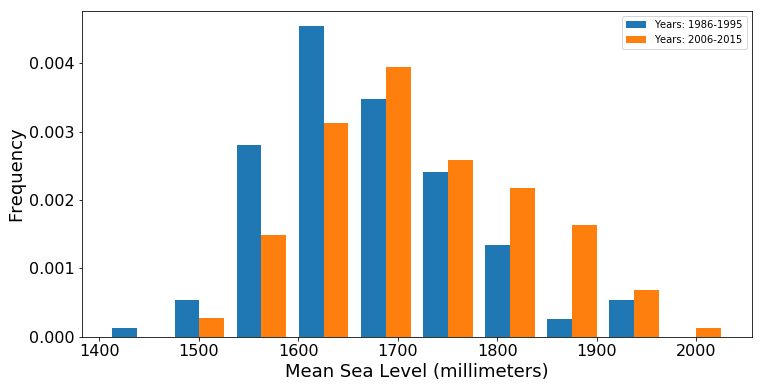

In [5]:
eighty6to95 = pd.DataFrame(dfClean.loc[(dfClean['Year']>=1986)&(dfClean['Year']<=1995)]).reset_index()
two006to15 = dfClean.loc[(dfClean['Year']>=2006)&(dfClean['Year']<=2015)]

plt.figure(figsize=(12,6))         
plt.hist([eighty6to95['SL'],two006to15['SL']], density = True)
plt.legend(['Years: 1986-1995','Years: 2006-2015'])
plt.tick_params(labelsize = 16)
plt.xlabel('Mean Sea Level (millimeters)', size = 18)
plt.ylabel('Frequency', size = 18)
plt.show();


Hypothesis: Based on the histograms above, the mean sea level seemed to be higher from 2006-2015 (higher frequencies of higher sea levels) relative to the mean sea level from 1986-1995. 

**Part D:** Compute a 99.9% confidence interval for each of (1) the mean sea level in the 1986-1995 decade ($\mu_{1986-1995}$) and (2) the mean sea level in the 2006-2015 decade ($\mu_{2006-2015}$).  You may use Python for arithmetic operations and executing the calculations, but the relevant steps/set-up should be displayed in Markdown/MathJax.

Based on these two confidence intervals, do you think there is sufficient evidence to conclude that there is or is not a significant difference in the mean sea level between 1986-1995 and 2006-2015? Justify your answer. 

**Solution: Part D**

The bounds for a ($1-\alpha)\times100$% confidence interval are given by:

$$upper = \bar X + z_{\alpha/2} \frac {\sigma}{\sqrt n}$$

$$lower = \bar X - z_{\alpha/2} \frac {\sigma}{\sqrt n}$$

In [6]:
def CIbounds(CI, mu, sigma, n):   
    z = stats.norm.ppf(1-(1-CI)/2)
    return (mu-z*sigma/np.sqrt(n), mu+z*sigma/np.sqrt(n))


#Calculations for 1986-1995
mean86 = eighty6to95['SL'].mean()
std86 = np.std(eighty6to95['SL'])
num86 = len(eighty6to95)
eight6bounds = CIbounds(.999, mean86, std86, num86)

#Calculations for 2006-2015
mean06 = two006to15['SL'].mean()
std06 = np.std(two006to15['SL'])
num06 = len(two006to15)
zero6bounds = CIbounds(.999, mean06, std06, num06)

print("The 99.9% confidence interval for the mean sea level from 1986-1995: [{:.2f}, {:.2f}] ".format(eight6bounds[0],eight6bounds[1]))

print("The 99.9% confidence interval for the mean sea level from 2006-2015: [{:.2f}, {:.2f}] ".format(zero6bounds[0],zero6bounds[1]))

The 99.9% confidence interval for the mean sea level from 1986-1995: [1641.11, 1700.04] 
The 99.9% confidence interval for the mean sea level from 2006-2015: [1687.55, 1753.81] 


The two confidence intervals are overlapping from 1687.55 to 1700.04. Since there is a chance that both of their true means lies within this overlapping region, there is still a chance their true means are the same, thus there is not sufficient evidence to conclude their means are different.

**Part E:**  Compute a 99.9% confidence interval for the ***difference in mean sea level*** between the 2006-2015 and the 1986-1995 decades ($\mu_{2006-2015} - \mu_{1986-1995}$. Based on this, make a conclusion regarding your hypothesis from **Part C**, and compare to what your results in **Part D** implied. You may use Python for arithmetic operations and executing the calculations, but the relevant steps/set-up should be displayed in Markdown/MathJax.

**Solution: Part E**

For the difference between the two:

$$\mu_{difference} = \mu_{2006-15} - \mu_{1986-95}$$

$$\sigma_{difference} = \sqrt{\frac{\sigma_{\small2006-15}^2}{n_{\small2006-15}}+\frac{\sigma_{\small1986-95}^2}{n_{\small1986-95}}}$$

$$upper = \mu_{difference}+ z_{\alpha/2} \sigma_{difference}$$

$$lower = \mu_{difference} - z_{\alpha/2} \sigma_{difference}$$

In [7]:
mu_dif = mean06-mean86

sigma_dif = np.sqrt(std06**2/num06+std86**2/num86)

results = CIbounds(.999, mu_dif, sigma_dif, 1)

print("The 99.9% confidence interval for the mean sea level difference: [{:.2f}, {:.2f}] ".format(results[0],results[1]))

The 99.9% confidence interval for the mean sea level difference: [5.77, 94.44] 


Based on this result, the mean difference does seem to be statistically significantly different since the confidence interval does not include 0. The interval range is entirely positive so the mean sea level from 2006-2015 seems to be significantly higher than the mean sea level from 1986-1995. This result agrees with my hypothesis from part C, however the results from part D were not sufficient to conclude that my hypothesis was correct (were not sufficient to reject the null hypothesis that the mean sea levels are not different)

**Part F:**  The confidence intervals from **Parts D** and **E** were derived using the Central Limit Theorem.  Which assumption of the Central Limit Theorem would likely be violated if we took more than one measurement per month to form our samples, and why?

**Solution: Part F**

The sample would differ depending on the time of the month because tides are cyclic, so you would probably be sampling from two distributions with with slightly different parameters. This would violate the assumption that the samples are identically distributed.

---

<a id='p2'></a>
[Back to top](#top)

### [25 points] Problem 2 - Quality of Red vs White Wine 

**Part A:** Load the data in [`winequalityred.csv`](https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jixzm1ebc6q6ye) and [`winequalitywhite.csv`](https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jixzm17x9pu6y9) into Pandas DataFrames.  They are available under Resources on Piazza, and linked here and below.  A description of this dataset can be found on [UC Irvine's Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). The quantity of interest for this problem is the quality of the wine.

Are we justified in using the Central Limit Theorem in our analysis of estimates of the mean and proportions of the data?  Justify your response. 

**Solution: Part A**

In [8]:
# read either local or web file version; pick whichever works for you
local_file_white = "../../data/winequalitywhite.csv"
local_file_red   = "../../data/winequalityred.csv"
web_file_white = "https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jixzm17x9pu6y9"
web_file_red   = "https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jixzm1ebc6q6ye"

dfRed   = pd.read_csv(web_file_red, delimiter = ';')
dfWhite = pd.read_csv(web_file_white, delimiter = ';')
dfRed.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


CLT Assumptions/Requirements:

1) Random Samples: assuming that the red and white wines sampled were completely random from the population of all red and white wines then this condition is met

2) Independence of Measurements: the scores for each wine sampled should be independent of all the other wine samples

3) Large Sample Size: the sample sizes of the red and white wines are both respectively over 30

4) Identical Distribution: the samples should come from the same distribution 

Since the above are true/met, we are justified in using the CLT.

**Part B:** Let $X$ be a random variable denoting the quality of a bottle of wine, and let $C$ be a random variable denoting its color (either red ($r$) or white ($w$)). For the remainder of this problem, we are concerned with probabilities such as "If I buy a random bottle of red wine, what is the probability that its quality is at least a 7?". We could write that probability as $P(X \geq 7 \mid C=r)$, for example, and consider it the ***proportion*** of the population of red wines that are at least a 7 in quality. Calculate and report estimates of $P(X \geq 7 \mid C=r)$ and $P(X \geq 7 \mid C=w)$.

Obtain 95% confidence intervals for the proportion of red and white wines that are **at least** a 7 in quality (obtain one CI for each color).  Based on your results, if you are interested in buying many high quality bottles of wine but are buying totally at random, is one color a better bet than the other? Fully justify your answer.

Calculations may be executed in Python, but you need to set up your work (*what* it is you are calculating) in Markdown/MathJax.

**Solution: Part B**

The bounds for a ($1-\alpha)\times100$% confidence interval are given by:

$$upper = \bar X + z_{\alpha/2} \frac {s}{\sqrt n}$$

$$lower = \bar X - z_{\alpha/2} \frac {s}{\sqrt n}$$

In this case the $\bar X$, $\sigma$ and n values will be calculated from the respective data frames above. 

$$\bar X = \hat{p} = \frac{count_{X\geq 7}}{total}$$

$$\frac {s}{\sqrt n} = \sqrt{Var(\hat{p})} = \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$$


So substituting in we have:

$$upper = \hat{p}+ z_{\alpha/2} \sqrt{\frac {\hat{p}(1-\hat{p})}{n}}$$

$$lower = \hat{p}- z_{\alpha/2} \sqrt{\frac {\hat{p}(1-\hat{p})}{n}}$$

In [9]:
#Red Calculations
num_red = len(dfRed)
p_red = (dfRed['quality'] >= 7).sum()/num_red
sigma_red = np.sqrt(p_red*(1-p_red))
red_results = CIbounds(0.95, p_red, sigma_red, num_red)

#White Calculations
num_white = len(dfWhite)
p_white = (dfWhite['quality'] >= 7).sum()/num_white
sigma_white = np.sqrt(p_white*(1-p_white))
white_results = CIbounds(0.95, p_white, sigma_white, num_white)


print("The 95% confidence interval for the proportion of red wine with quality >= 7 : [{:.2f}, {:.2f}] ".format(red_results[0],red_results[1]))
print("The 95% confidence interval for the proportion of white wine with quality >= 7 : [{:.2f}, {:.2f}] ".format(white_results[0],white_results[1]))

The 95% confidence interval for the proportion of red wine with quality >= 7 : [0.12, 0.15] 
The 95% confidence interval for the proportion of white wine with quality >= 7 : [0.20, 0.23] 


Based on the red and white CI's above, the white wine has a 95% CI for the proportion of white wines of high quality that is both non-overlapping and higher than the 95% CI for the proportion of red wines of high quality. Since the CI for the white wine is higher then it is likely that the probability that each random wine chosen is high quality is also higher if you choose from the whites rather than the reds, so you should choose from the whites. 

**Part C:** Now, as college students (and teachers), we might not be super concerned with buying a really high quality bottle of wine.  In fact, you might be confused about what these "bottles" this problem is referring to are... don't we mean "bags"?  But I digress.  Let's focus instead on making sure we do *not* buy a really disgusting bottle of wine.  Calculate and report estimates of $P(X \geq 5 \mid C=r)$ and $P(X \geq 5 \mid C=w)$.

Obtain two 95% confidence intervals, one for the proportion of red wines and one for white wines, that are **at least** a 5 in quality, that is, $P(X \geq 5 \mid C)$.  Based on your results - and what you saw in Problem 1 - if you are interested in buying bottles of wine that are at least a 5 in quality, but are again buying wine totally randomly, can you conclude that you are better off buying one color over the other? Fully justify your answer.

**Solution: Part C**

In [10]:
#Red Calculations
num_red = len(dfRed)
p_red = (dfRed['quality'] >= 5).sum()/num_red
sigma_red = np.sqrt(p_red*(1-p_red))
red_results = CIbounds(0.95, p_red, sigma_red, num_red)

#White Calculations
num_white = len(dfWhite)
p_white = (dfWhite['quality'] >= 5).sum()/num_white
sigma_white = np.sqrt(p_white*(1-p_white))
white_results = CIbounds(0.95, p_white, sigma_white, num_white)

print("The 95% confidence interval for the proportion of red wine with quality >= 5 : [{:.2f}, {:.2f}] ".format(red_results[0],red_results[1]))
print("The 95% confidence interval for the proportion of white wine with quality >= 5 : [{:.2f}, {:.2f}] ".format(white_results[0],white_results[1]))

The 95% confidence interval for the proportion of red wine with quality >= 5 : [0.95, 0.97] 
The 95% confidence interval for the proportion of white wine with quality >= 5 : [0.96, 0.97] 


Since these CI's are overlapping we cannot conclude anything at this point if we are trying to compare the expected proportions of white or red wines that are moderate to high quality. We may reach a conclusion if we calculate CI for the difference in the expected proportion of wines with quality $\geq 5$

**Part D:** Compute a 95% confidence interval for the difference in proportions of red and white wines that are at least a 5 in quality. 

Now, based on your results for this part, can you conclude that you are better off buying one color over the other? Fully justify your answer. How does your work here differ from your work in **Part C**?

**Solution: Part D**

Subscript w is the variable for white wine and subscript r is the variable for red wine: 

$$CI_{bounds} = (\hat{p_{\small w}} - \hat{p_{\small r}}) \pm z_{\alpha/2}\sqrt{Var(\hat{p_{\small w}} - \hat{p_{\small r}})}$$

$$Var(\hat{p_{\small w}} - \hat{p_{\small r}}) = Var(\hat{p_{\small w}}) + (-1^2) Var(\hat{p_{\small r}})$$

$$Var(\hat{p_{\small w}} - \hat{p_{\small r}}) = \frac {\hat{p_{\small w}}(1-\hat{p_{\small w}})}{n_w} + \frac {\hat{p_{\small r}}(1-\hat{p_{\small r}})}{n_r}$$

So substituting in:

$$CI_{bounds} = (\hat{p_{\small w}} - \hat{p_{\small r}}) \pm z_{\alpha/2}\sqrt{\frac {\hat{p_{\small w}}(1-\hat{p_{\small w}})}{n_w} + \frac {\hat{p_{\small r}}(1-\hat{p_{\small r}})}{n_r}}$$


In [11]:
dif_p = p_white - p_red
sigma_p = np.sqrt((p_red*(1-p_red))/num_red + (p_white*(1-p_white))/num_white)
difCI = CIbounds(0.95, dif_p, sigma_p, 1)
print("The 95% confidence interval for the difference in proportion of white wine and proportion of red wine with quality >=5: [{:.2f}, {:.2f}] ".format(difCI[0],difCI[1]))

The 95% confidence interval for the difference in proportion of white wine and proportion of red wine with quality >=5: [-0.01, 0.01] 


You still cannot conclude that one is better than the other since the confidence interval for the difference includes 0 which means it includes the possibility that the red and white wine proportions are the same. The quantity of interest here is the difference between the proportions, not just the proportions themselves, and the error is smaller than the sum of the errors for the red and white wine proportions because you take the square root of the sum of the variances. This tightening (of sorts) means that you could see a significant result when looking at the difference between the types that might be hidden when comparing the confidence intervals for each type directly, as in Part C. 

**Part E:**  Now, we have many more observations of white wines than red. This certainly contributes to the width of the 95% confidence interval for the proportion of red wines that are at least a 5 in quality, which you should have found in **Part C** to be wider than the corresponding confidence interval for white wines. 

How large would our sample size of red wines need to be in order to guarantee that this 95% confidence interval width is at most 0.01? Note that we are hypothetically adding more samples, so we do not know the precise value of $\hat{p}$.

**Solution: Part E**

For a CI with width = 0.01:

$$0.01 = upper-lower$$

$$0.01 = \bigg(\hat{p}+ z_{\alpha/2} \sqrt{\frac {\hat{p}(1-\hat{p})}{n}}\bigg) - \bigg(\hat{p}- z_{\alpha/2} \sqrt{\frac {\hat{p}(1-\hat{p})}{n}}\bigg)$$

$$0.01= 2z_{\alpha/2} \sqrt{\frac {\hat{p}(1-\hat{p})}{n}}$$

$$\bigg(\frac{0.005}{z_{\alpha/2}}\bigg)^2=  \frac {\hat{p}(1-\hat{p})}{n}$$

$$n =  \frac {\hat{p}(1-\hat{p})}{\big({0.005}/{z_{0.025}}\big)^2}$$

So you would need at least the n above, which you could solve for if you knew the precise $\hat{p}$, the only unknown on the right side of the equation.

---

<a id='p3'></a>
[Back to top](#top)

### [15 points] Problem 3:  Are you tired of re-doing the same confidence intervals calculation over and over again? Then this is the problem for you!

Turns out, the mechanics of computing confidence intervals are fairly formulaic, once you get the hang of it.  If you have done the first two problems, I would say with 99% confidence that you are tired of copy-pasting code and putting in new data frames and numbers. So let's develop some flexible, generic software to do this for us. Yay computers!

In order to test drive our software, we will use the [weather data set](https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jhzhwu02pxq4eq) from the in-class notebooks back in the beginning of the semester (and linked here).  Execute the code cell below to load the data, print out the valid site names, and view the first few lines, including the column headers.

In [12]:
# Two different paths to the data 
local_path = 'data/clean_boulder_weather.csv'
web_path   = 'https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jhzhwu02pxq4eq'

# Select the path that works for you 
file_path = web_path 


# Load the data into a DataFrame 
df = pd.read_csv(file_path)
df.head()

# View the site names
print("Site names are:",set(df["NAME"]))

df.head()

Site names are: {'NIWOT, CO US', 'NORTHGLENN, CO US', 'BOULDER, CO US', 'RALSTON RESERVOIR, CO US', 'SUGARLOAF COLORADO, CO US', 'GROSS RESERVOIR, CO US', 'BOULDER 14 W, CO US'}


,STATION,NAME,DATE,PRCP,TMAX,TMIN
0,USW00094075,"BOULDER 14 W, CO US",2017-07-01,0.00,68.0,31.0
1,USW00094075,"BOULDER 14 W, CO US",2017-07-02,0.00,73.0,35.0
2,USW00094075,"BOULDER 14 W, CO US",2017-07-03,0.00,68.0,46.0
3,USW00094075,"BOULDER 14 W, CO US",2017-07-04,0.05,68.0,43.0
4,USW00094075,"BOULDER 14 W, CO US",2017-07-05,0.01,73.0,40.0


**Your task:** Write a function called `ci_mean` with the following specifications.  You are **NOT** allowed to use this function for Problems 1 and 2, but are encouraged to use it to check your answers. You may use this function for Problem 4.

**Code Specifications:**

Arguments:
* `x` -- A list, numpy array, or Pandas DataSeries ("array-like object") that constitutes the data we want a confidence interval for the mean of its population, $\mu_x$.
* `y` -- An optional argument with a default of `None`. Also an array-like object. If `y` is specified, then the function should return a confidence interval for the difference in means, $\mu_x - \mu_y$.
* `sx` -- An optional argument with a default of `None`. If specified, `sx` is the true known standard deviation of the population of `x`.
* `sy` -- An optional argument with a default of `None`. If specified, `sy` is the true known standard deviation of the population of `y`. If `sy` is specified but `y` is not, your code should proceed with computing a confidence interval for the mean of the `x` population only.
* `alp` -- Tail area for the confidence interval (i.e., you want to calculate a $100(1-\textrm{alp})\%$ confidence interval). Should have a default value of $0.05$.

Output:
* `CI` -- A tuple giving the lower and upper confidence bounds for the $100(1-\textrm{alp})\%$ confidence interval.

Required Output: show us output for the following
* For NIWOT, CO US, use your `ci_mean` function to construct a 90% confidence interval for the mean July 2017 maximum temperatures, $\mu_{niwot}$.
* For BOULDER 14 W, CO US, use your `ci_mean` function to construct a 90% confidence interval for the mean July 2017 maximum temperatures, $\mu_{boulder14}$. Based on your answers so far, can you conclude anything at the 90% confidence level about any differences in mean July 2017 daily maximum temperature in Niwot and Boulder 14 W?
* Use your `ci_mean` function to compute a 90% confidence interval for the difference in mean July 2017 daily maximum temperature between NIWOT and BOULDER 14 W, $\mu_{niwot} - \mu_{boulder14}$. Can you conclude anything, at the 90% confidence level, about the difference in mean daily maximum temperature in July for the two sites?

Unit Tests: not required, but encouraged
* Check your answers to Problems 1 and 2.
* Check your answers for the Required Output by hand.
* Crowd-source some unit tests:  Check your answers for other combinations of the weather data sites and confidence levels with your peers on Piazza!
* There is sizable probability that we will use other test cases to grade your code, including possibly other problems from this homework, and other sets of data. So your code must **not** be hard-coded to expect input from the weather data set.

In [13]:
def ci_mean(x,y=None, sx = None, sy = None, alp = 0.05):
    z = stats.norm.ppf(1-alp/2)
    mu_x = np.mean(x)
    n_x = len(x)
    if sx == None:
        s = np.std(x)
    else: 
        s = sx
    if y is not None:
        mu_y = np.mean(y)
        n_y = len(y)
        mu_dif = mu_x - mu_y
        if sy == None:
            s_y = np.std(y)
        else: 
            s_y = sy
        s_dif = np.sqrt(s**2/n_x+s_y**2/n_y)
        return (mu_dif - z*s_dif, mu_dif + z*s_dif)
    return (mu_x - z*s/np.sqrt(n_x), mu_x + z*s/np.sqrt(n_x))


In [14]:
#Q3 Output
niwot = df.loc[df['NAME']=='NIWOT, CO US']
niwotCI = ci_mean(niwot['TMAX'], alp=0.1 )
boulder = df.loc[df['NAME']=='BOULDER 14 W, CO US']
boulderCI = ci_mean(boulder['TMAX'], alp=0.1 )
boulderNiwotDifCI = ci_mean(x = niwot['TMAX'],y = boulder['TMAX'], alp = 0.1)

print("The 90% confidence interval for the mean max. temperature (F) in July for Niwot: [{:.2f}, {:.2f}] ".format(niwotCI[0],niwotCI[1]))
print("The 90% confidence interval for the mean max. temperature (F) in July for Boulder: [{:.2f}, {:.2f}] ".format(boulderCI[0],boulderCI[1]))

print("The 90% confidence interval for the mean max. temperature (F) in July for Boulder: [{:.2f}, {:.2f}] ".format(boulderNiwotDifCI[0],boulderNiwotDifCI[1]))

The 90% confidence interval for the mean max. temperature (F) in July for Niwot: [68.20, 71.47] 
The 90% confidence interval for the mean max. temperature (F) in July for Boulder: [67.24, 70.38] 
The 90% confidence interval for the mean max. temperature (F) in July for Boulder: [-1.23, 3.30] 


Based on the first two 90% CI's above, you cannot conclude anything about the difference between the Niwot and Boulder 14 W mean max. temperatures since the CI's are overlapping. 

Based on the 90% CI for the difference in the mean max. temperatures you still cannot conclude that there is a difference between Niwot and Boulder 14 W since the CI contains 0. 

---

<a id='p4'></a>
[Back to top](#top)

### [30 points] Problem 4 - Exploring Confidence Intervals 

The [Gumbel](https://en.wikipedia.org/wiki/Gumbel_distribution) distribution is one of several distributions frequently used to model environmental extremes (for example, extreme temperatures and sea levels).  It is also fairly asymmetric, and thus interesting for investigating confidence intervals.  It is implemented in scipy.stats as [gumbel_r](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gumbel_r.html), where the appendix "\_r" denotes the right-skewed version of the Gumbel distribution (as opposed to the left-skewed).

**Part A**: Complete the following code cell to plot a histogram of 1,000 realizations from the Gumbel distribution with parameters $\mu=8$ and $\beta=2$.  Be sure to leave this cell executed before turning in your assignment!

**Solution: Part A**

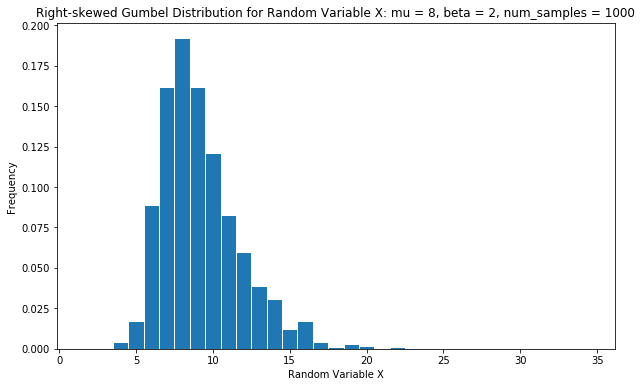

In [15]:
mu = 8
beta = 2
n_sample = 1000
x = stats.gumbel_r.rvs(loc=mu, scale=beta, size=n_sample)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

ax.hist(x, bins = np.arange(1.5, 35.5, 1),density = True, ec = 'white')
plt.ylabel('Frequency')
plt.xlabel('Random Variable X')
plt.title('Right-skewed Gumbel Distribution for Random Variable X: mu = 8, beta = 2, num_samples = 1000');
# your code goes here!


**Part B:** Look up the analytical mean and variance of the Gumbel distribution with parameters $\mu=8$ and $\beta=2$ and calculate them here by hand.  Note that the Euler–Mascheroni constant can be accessed via `np.euler_gamma`. 

Use the empirical mean from your sample in **Part A**, and the true variance of the Gumbel distribution to compute by hand a 95% confidence interval for the mean.  Feel free to use your code from **Problem 3** here!

**Solution: Part B**

The analytical mean is given by:

$$E[X] = \mu + \gamma \beta$$

$$E[X] = 8 + \gamma 2$$

The analytical variance is given by:

$$Var(X) = \frac{\pi^2}6\beta^2$$

$$Var(X) = \frac{\pi^2}62^2$$

In [16]:
#calculations

anlytMean = mu + np.euler_gamma*beta
print("The analytical mean is {:.2f}".format(anlytMean))

anlytVar = (beta**2)*(np.pi**2)/6
print("The analytical variance is {:.2f}".format(anlytVar))

The analytical mean is 9.15
The analytical variance is 6.58


In [17]:
gumbelCI = ci_mean(x, sx = anlytVar)
print("The 95% CI for a random variable, X, with a Gumbel Distribution (mu = 8, beta = 2, num_samples = 1000): [{:.2f}, {:.2f}] ".format(gumbelCI[0],gumbelCI[1]))

The 95% CI for a random variable, X, with a Gumbel Distribution (mu = 8, beta = 2, num_samples = 1000): [8.78, 9.60] 


**Part C:  A theoretical interlude.** When I ran my solution code for **Part B**, I obtained a 95% confidence interval of $[8.81, 9.82]$ for the mean of the $Gum(\mu=8, \beta=2)$ distribution. For each of the following, explain why or why not the situation described is correct, given the technical definition of a 95% confidence interval we went over in class.

**(i)** If you had no other evidence regarding true mean of the $Gum(\mu=8, \beta=2)$ distribution, you could say there is a 95% chance that its true mean falls between 8.81 and 9.82.

**(ii)** If a class of 100 students all construct 95% confidence intervals for the mean of the $Gum(\mu=8, \beta=2)$ distribution, then we expect about 95 of their CIs to contain the true mean, and about 5 of them to miss the true mean.

**(iii)** There is a 95% probability that any given random variable sampled from $Gum(\mu=8, \beta=2)$ will be between 8.81 and 9.82.

**Solution: Part C**

*(i)*

This is correct. If you take n 95% confidence intervals, you would expect $0.95\times n$ of those n samples to contain the true mean, so that means each individual confidence interval calculated has a 0.95 probability of containing the true mean. 

*(ii)*

This is correct. As mentioned above, a 95% CI means that if you calculate n CI's you expect $0.95\times n$ of those n samples to contain the true mean, so in this case you would expect $0.95\times 100=95$ of those 100 CI's to contain the true mean. Thus $100-95 = 5$ would miss the true mean.

*(iii)*

This is not correct. 95% of the data used to calculate the CI falls within this range, but if this range happens to be one of the 5% of CI's that does not contain the true mean then it probably falls in a region with low probability density in the true distribution of the random variable and the probability any random variable sampled falls within this regions would be far below 0.95. If this CI happens to closely match the true distribution then you might end up with a 0.95 probability of any random variable sampeld falling within this range, however there is no guarantee your CI would perfectly match the distribution about the true mean. 

**Part D:** In this part you'll write a function to investigate the _coverage properties_ of a confidence interval for the mean of the Gumbel distribution. Complete the following function to randomly sample $m=500$ sample means with sample size $n=100$ for the Gumbel distribution with parameters $\mu=8$ and $\beta=2$.  For each random sample, compute the 95% confidence interval for the mean.  Note that you actually know that the variance for the true population distribution is, $\sigma^2$.  Your function should do two things: 

1. Report the proportion of confidence intervals that successfully cover the true mean of the distribution 
2. Make a plot of 50 randomly selected confidence intervals. Overlay the intervals on the line $y=\textrm{True mean}$ (from **Part B**). Color confidence intervals black if they cover the true mean, and red if they don't.  

Be sure to leave this cell executed before turning in your assignment!

**Solution: Part D**

The proportion of CI's that contain mu is 0.95


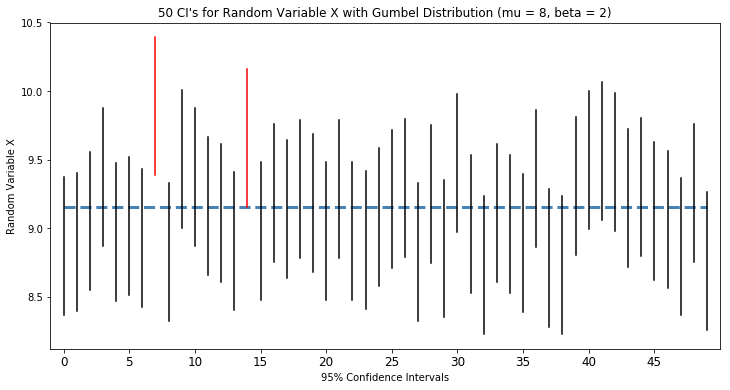

0.952

In [19]:
def confidence_intervals(m=500, n=100):
    mu = 8
    beta = 2
    anlytMean = mu + np.euler_gamma*beta
    anlytVar = (beta**2)*(np.pi**2)/6
    allCIs = [ci_mean(stats.gumbel_r.rvs(loc=mu, scale=beta, size=n), sx = np.sqrt(anlytVar)) for x in range(m)]
    numCIsWithMu = 0
    
    for CI in allCIs:
        if CI[0]<= anlytMean and CI[1] >= anlytMean:
            numCIsWithMu += 1
    proportionWithMu = numCIsWithMu/m
    print("The proportion of CI's that contain mu is {:.2f}".format(proportionWithMu))
    
    indices = list(range(m))
    random.shuffle(indices)
    toPlot = []
    
    for x in indices[:50]:
        toPlot.append(allCIs[x])
        
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    ax.plot([0,49], [anlytMean,anlytMean], color="steelblue", ls='--', lw=3)
    
    for i, x in enumerate(toPlot):
        if x[0]<= anlytMean and x[1] >= anlytMean:
            ax.plot([i,i], [x[0],x[1]], color = 'black')
        else:
            ax.plot([i,i], [x[0],x[1]], color = 'red')
    ax.set_xlim([-1,50])
    plt.xticks(np.arange(0,50, 5), fontsize=12)
    plt.ylabel("Random Variable X")
    plt.xlabel("95% Confidence Intervals")
    plt.title("50 CI's for Random Variable X with Gumbel Distribution (mu = {:}, beta = {:})".format(mu,beta))
    plt.show();
    return(numCIsWithMu/m)
    # your code goes here!
confidence_intervals()

**Part E:** Does the proportion of confidence intervals that cover the true mean of the distribution agree with the theory described in class?  Justify your conclusion. 

**Solution: Part E**

The proportion of CI's that contain the true mean should be equal to the confidence level, which in this case is 95%  or 0.95. The proportion of the 500 CI's that contain the true mean matches this expected value of 0.95.

**Part F**: In general, which is wider: a 95% confidence interval or a 99% confidence interval? Now, ELIF.  That is, *Explain it Like I'm Five*.

**Solution: Part F**

A 99% confidence interval is wider than a 95% confidence interval. To increase the likelihood that any confidence interval contains the true mean you can widen the confidence interval (give yourself more opportunities, basically, to have captured the true mean by casting a bigger net), so to ensure that 99% of the CI's contain the true mean (vs. 95%) you would make each 99% CI wider than a CI with a lower confidence level. 

---
[Back to top](#top)